# 安装serial库，只需运行一次

In [15]:
# !pip3 install pyserial-3.4-py2.py3-none-any.whl
# !pip3 install websocket_server
# ! pip3 install --upgrade pip
! pip3 install opencv-python

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f846f7940>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/opencv-python/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f846f7b38>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/opencv-python/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f846f7a90>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/opencv-python/
  Retrying (Retry(total=1, connect=None, read=None, redirect=Non

In [6]:
import cv2

In [1]:
from PIL import Image as PIL_Image
from websocket_server import WebsocketServer
import utils

In [1]:
from pynq.lib import Wifi

port = Wifi()
ssid = "Luke's HUAWEI P30 Pro"
pwd  = "65712949"
# ssid = "HUAWEI P30"
# pwd  = "12345678a"
port.connect(ssid, pwd)

# 测试头部摄像头

--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 640x480.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'.
Writing JPEG image to '2'.


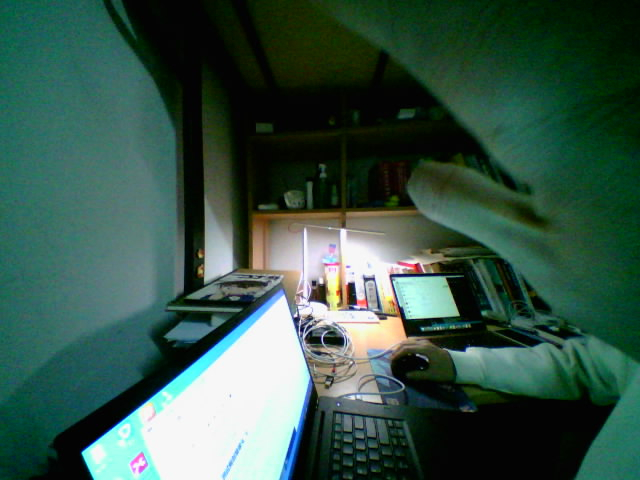

In [3]:
orig_img_path = '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'
# !fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2

img = PIL_Image.open(orig_img_path)
img

# 测试胸部摄像头

--- Opening /dev/video2...
Trying source module v4l2...
/dev/video2 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 640x480.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'.
Writing JPEG image to '2'.


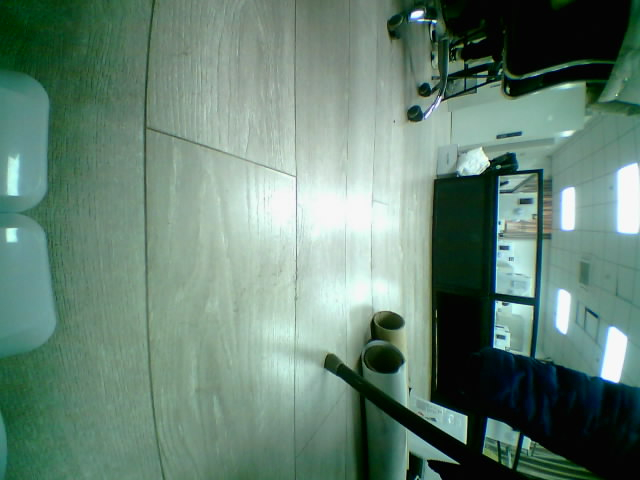

In [5]:
orig_img_path = '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video2 2

img = PIL_Image.open(orig_img_path)
img

In [2]:
import binascii
import serial
import os

In [3]:
os.system('sh ./stop_sys_ttyPS0.sh')

0

In [4]:
def run_action(cmd):
    ser = serial.Serial("/dev/ttyPS0", 9600, timeout=5)
    cnt_err = 0
    while 1:
        test_read = ser.read()
        print('test_read', test_read)
        cnt_err += 1
        if test_read== b'\xa3' or cnt_err == 50:
            break
    
    if cnt_err == 50:
        print('can not get REQ')
    else:
        print('read REQ finished!')
        ser.write(cmd2data(cmd))
        print('send action ok!')
    ser.close()

In [5]:
def crc_calculate(package):
    crc = 0
    for hex_data in package:

        b2 = hex_data.to_bytes(1, byteorder='little')
        crc = binascii.crc_hqx(b2, crc)

    return [(crc >> 8), (crc & 255)]    # 校验位两位

In [6]:
def cmd2data(cmd):
    cnt=0
    cmd_list=[]
    for i in cmd:
        cnt+=1
        cmd_list+=[ord(i)]
    cmd_list=[0xff,0xff]+[(cnt+5)>>8,(cnt+5)&255]+[0x01,(cnt+1)&255,0x03]+cmd_list
    cmd_list=cmd_list+crc_calculate(cmd_list)
    return cmd_list

In [7]:
def wait_req():
    ser = serial.Serial("/dev/ttyPS0", 9600, timeout=5)
    while 1:
        test_read=ser.read()
        if test_read== b'\xa3' :
            print('read REQ finished!') 
            break
        

# 测试动作调用，上面的函数用来解码机器人主板的串口通信协议，不必深究，动作名请查阅机器人内部存储/lua/actionlib.lua

In [9]:
run_action('XiaDun')
wait_req()
run_action('Stand')

test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!
read REQ finished!
test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0e'
test_read b'\x06'
test_read b'E'
test_read b'R'
test_read b'R'
test_read b'O'
test_read b'R'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b' '
test_read b'\x13'
test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!


In [21]:
run_action('HeadTurn060')
wait_req()
run_action('HeadTurnMM')
wait_req()

test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!
read REQ finished!
test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0e'
test_read b'\x06'
test_read b'E'
test_read b'R'
test_read b'R'
test_read b'O'
test_read b'R'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b' '
test_read b'\x13'
test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!
read REQ finished!


In [13]:
# run_action('Right3move')
# wait_req()
run_action('fastForward04')
wait_req()

test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0e'
test_read b'\x06'
test_read b'E'
test_read b'R'
test_read b'R'
test_read b'O'
test_read b'R'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b' '
test_read b'\x13'
test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!
read REQ finished!


In [26]:
# websocket实现通信并控制机器人的运行代码

# Called for every client connecting (after handshake)
def new_client(client, server):
    print("New client connected and was given id %d" % client['id']) 
    server.send_message_to_all("Hey all, a new client has joined us")
    
# Called for every client disconnecting
def client_left(client, server):
    print("Client(%d) disconnected" % client['id'])
# Called when a client sends a message

def message_received(client, server, message): 
    print("Client(%d) said: %s" % (client['id'], message))
    # do your Moving logic here
    run_action('Forwalk05')
    wait_req()

server = WebsocketServer(host = "192.168.43.46", port = 19260)
server.set_fn_new_client(new_client) 
server.set_fn_client_left(client_left) 
server.set_fn_message_received(message_received) 
server.run_forever()


In [14]:
run_action('HeadTurnMM')

test_read b'\xff'
test_read b'\xff'
test_read b'\x00'
test_read b'\x0c'
test_read b'\x04'
test_read b'R'
test_read b'E'
test_read b'Q'
test_read b'\x00'
test_read b'\x01'
test_read b'\x03'
test_read b'\x02'
test_read b'\x00'
test_read b'\x00'
test_read b'\x8e'
test_read b'\xa3'
read REQ finished!
send action ok!
